In [1]:
import pandas as pd # pandas provides indexing structure and data manipulation functionality

#### Reading data

In [2]:
camp = pd.read_csv("campaign.csv")

#### Examine the data

In [3]:
camp.shape

(10022, 10)

In [4]:
camp.columns

Index(['user_id', 'date_served', 'marketing_channel', 'test_control',
       'converted', 'language_preferred', 'age_group', 'date_subscribed',
       'date_canceled', 'is_retained'],
      dtype='object')

In [5]:
# look at the data
camp.head(100)

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,a100000029,1/1/2018,House Ads,personalization,True,English,0-18 years,1/1/2018,NaN,True
1,a100000030,1/1/2018,House Ads,personalization,True,English,19-24 years,1/1/2018,NaN,True
2,a100000031,1/1/2018,House Ads,personalization,True,English,24-30 years,1/1/2018,NaN,True
3,a100000032,1/1/2018,House Ads,personalization,True,English,30-36 years,1/1/2018,NaN,True
4,a100000033,1/1/2018,House Ads,personalization,True,English,36-45 years,1/1/2018,NaN,True
...,...,...,...,...,...,...,...,...,...,...
95,a100000104,1/5/2018,House Ads,control,True,English,0-18 years,1/5/2018,2/17/2018,False
96,a100000104,1/4/2018,House Ads,control,False,English,0-18 years,1/5/2018,2/17/2018,False
97,a100000105,1/5/2018,House Ads,control,True,English,19-24 years,1/5/2018,4/14/2018,False
98,a100000105,1/4/2018,House Ads,control,False,English,19-24 years,1/5/2018,4/14/2018,False


In [6]:
# look at the summary info
camp.describe()

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
count,10022,10021,10022,10022,10022,10022,10022,1856,577,1856
unique,7294,31,5,2,2,4,7,31,115,2
top,a100000882,1/15/2018,House Ads,control,False,English,19-24 years,1/16/2018,4/2/2018,True
freq,12,789,4733,5076,8946,9260,1679,163,15,1279


In [7]:
camp["marketing_channel"]

0        House Ads
1        House Ads
2        House Ads
3        House Ads
4        House Ads
           ...    
10017        Email
10018        Email
10019    Instagram
10020        Email
10021     Facebook
Name: marketing_channel, Length: 10022, dtype: object

In [8]:
camp[["marketing_channel"]]

,marketing_channel
0,House Ads
1,House Ads
2,House Ads
3,House Ads
4,House Ads
...,...
10017,Email
10018,Email
10019,Instagram
10020,Email


Check **duplicate** records for primary key column

In [9]:
len(camp["user_id"])

10022

In [10]:
len(camp["user_id"].unique())

7294

In [12]:
camp["user_id"].nunique()

7294

In [13]:
camp["marketing_channel"].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [15]:
camp["marketing_channel"].unique()

array(['House Ads', 'Push', 'Facebook', 'Instagram', 'Email'],
      dtype=object)

In [16]:
camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10022 entries, 0 to 10021
Data columns (total 10 columns):
user_id               10022 non-null object
date_served           10021 non-null object
marketing_channel     10022 non-null object
test_control          10022 non-null object
converted             10022 non-null bool
language_preferred    10022 non-null object
age_group             10022 non-null object
date_subscribed       1856 non-null object
date_canceled         577 non-null object
is_retained           1856 non-null object
dtypes: bool(1), object(9)
memory usage: 714.6+ KB


Creates a boolean dataframe with True for null values and False for non-null values

In [17]:
camp.isnull()

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
10017,False,False,False,False,False,False,False,False,False,False
10018,False,False,False,False,False,False,False,False,True,False
10019,False,False,False,False,False,False,False,False,True,False
10020,False,False,False,False,False,False,False,False,True,False


**get the number of Missing records in each column:**

In [18]:
camp.isnull().sum()

user_id                  0
date_served              1
marketing_channel        0
test_control             0
converted                0
language_preferred       0
age_group                0
date_subscribed       8166
date_canceled         9445
is_retained           8166
dtype: int64

### 2. Campaign result overview

#### Number of users receive marketing offers by day

In [19]:
#Group by date_served
daily_users = camp.groupby(['date_served'])['user_id'].nunique() 
# select date_served, count(distinct user_id) from campaign group by date_served;

In [20]:
print(daily_users)

date_served
1/1/2018     362
1/10/2018    337
1/11/2018    310
1/12/2018    301
1/13/2018    306
1/14/2018    305
1/15/2018    767
1/16/2018    388
1/17/2018    369
1/18/2018    318
1/19/2018    305
1/2/2018     374
1/20/2018    311
1/21/2018    229
1/22/2018    178
1/23/2018    172
1/24/2018    190
1/25/2018    184
1/26/2018    222
1/27/2018    320
1/28/2018    320
1/29/2018    319
1/3/2018     348
1/30/2018    317
1/31/2018    340
1/4/2018     323
1/5/2018     319
1/6/2018     308
1/7/2018     275
1/8/2018     312
1/9/2018     312
Name: user_id, dtype: int64


#### Visualization in Python

In [24]:
camp["date_served"] = pd.to_datetime(camp["date_served"])

In [26]:
camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10022 entries, 0 to 10021
Data columns (total 10 columns):
user_id               10022 non-null object
date_served           10021 non-null datetime64[ns]
marketing_channel     10022 non-null object
test_control          10022 non-null object
converted             10022 non-null bool
language_preferred    10022 non-null object
age_group             10022 non-null object
date_subscribed       1856 non-null object
date_canceled         577 non-null object
is_retained           1856 non-null object
dtypes: bool(1), datetime64[ns](1), object(8)
memory usage: 714.6+ KB


In [27]:
daily_users = camp.groupby(['date_served'])['user_id'].nunique()
print(daily_users)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


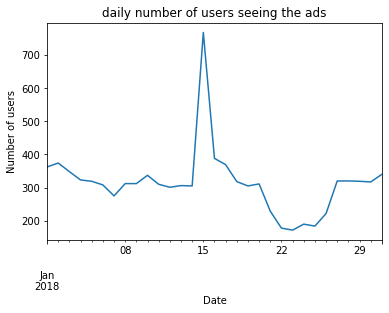

In [28]:
# plot
daily_users.plot()

# annotate
plt.title('daily number of users seeing the ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.show()

#### Overall conversion rate

In [30]:
camp.groupby(["converted"])["user_id"].nunique()

converted
False    6854
True     1015
Name: user_id, dtype: int64

In [32]:
camp['user_id'].nunique()

7294

In [33]:
camp.groupby(["converted"])["user_id"].nunique()/camp['user_id'].nunique()

converted
False    0.939676
True     0.139155
Name: user_id, dtype: float64

The sum of false and true rates larger than 1 is because there is duplicated user_id. User didn't get converted at first, and got converted later.

In [34]:
conversation_rate = 1015/7294
conversation_rate

0.13915547024952016

- **Conversion rate** = Number of people who converted / Total number of people who received offers
- **Retention rate** = number of people who remained / Total number of people who converted

### Filtering

In [36]:
# Create a boolean mask
camp['is_retained']==True

0         True
1         True
2         True
3         True
4         True
         ...  
10017    False
10018     True
10019     True
10020     True
10021     True
Name: is_retained, Length: 10022, dtype: bool

In [37]:
# Put the boolean mask into the dataframe
camp.loc[camp['is_retained']==True]    # == select * from campaign where is_retained = True

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,0-18 years,1/1/2018,NaN,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,19-24 years,1/1/2018,NaN,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,24-30 years,1/1/2018,NaN,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,30-36 years,1/1/2018,NaN,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,36-45 years,1/1/2018,NaN,True
...,...,...,...,...,...,...,...,...,...,...
10008,a100007281,2018-01-17,Email,control,True,German,30-36 years,1/17/2018,NaN,True
10018,a100007291,2018-01-17,Email,control,True,German,55+ years,1/17/2018,NaN,True
10019,a100007292,2018-01-05,Instagram,control,False,German,55+ years,1/17/2018,NaN,True
10020,a100007293,2018-01-17,Email,control,True,German,0-18 years,1/17/2018,NaN,True


In [38]:
retained = camp.loc[camp['is_retained']==True]['user_id'].nunique()

In [39]:
print(retained)

678


In [40]:
converted = camp.loc[camp['converted']==True]['user_id'].nunique()

In [41]:
print(converted)

1015


In [42]:
retention_rate = retained / converted

In [43]:
print(round(retention_rate,2))

0.67


#### Plot accumulative response rate by day:

In [47]:
daily_responder = camp.loc[camp['converted'] == True].groupby(['date_served'])['user_id'].nunique()

In [48]:
# cumsum(): method for accumulation
daily_responder.cumsum()

date_served
2018-01-01      36
2018-01-02      73
2018-01-03     109
2018-01-04     144
2018-01-05     184
2018-01-06     219
2018-01-07     258
2018-01-08     294
2018-01-09     333
2018-01-10     373
2018-01-11     398
2018-01-12     421
2018-01-13     447
2018-01-14     473
2018-01-15     560
2018-01-16     659
2018-01-17     740
2018-01-18     769
2018-01-19     787
2018-01-20     808
2018-01-21     828
2018-01-22     850
2018-01-23     871
2018-01-24     893
2018-01-25     916
2018-01-26     936
2018-01-27     957
2018-01-28     977
2018-01-29     996
2018-01-30    1017
2018-01-31    1035
Name: user_id, dtype: int64

In [49]:
accu_response_by_day = daily_responder.cumsum() / camp['user_id'].nunique()

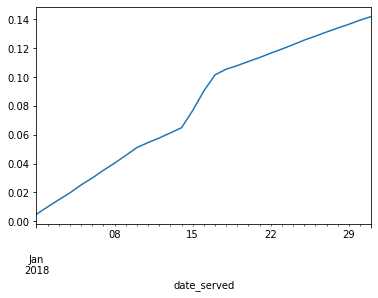

In [50]:
accu_response_by_day.plot()

#### Customer Segmentation analysis
- Analyze campaign performance by each segments
- Target profitable segments for next campaign

In [51]:
# Look at by marketing channel:
camp.groupby(['marketing_channel'])['user_id'].nunique()

marketing_channel
Email         553
Facebook     1758
House Ads    3968
Instagram    1740
Push          972
Name: user_id, dtype: int64

In [52]:
# How many customers are converted in each marketing channel
camp.loc[camp['converted'] == True].groupby(['marketing_channel'])['user_id'].nunique()

marketing_channel
Email        187
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

#### Conversion rate by channel

In [53]:
conversion_by_channel = camp.loc[camp['converted'] == True].groupby(['marketing_channel'])['user_id'].nunique() / \
camp.groupby(['marketing_channel'])['user_id'].nunique()

In [54]:
print(conversion_by_channel)

marketing_channel
Email        0.338156
Facebook     0.125711
House Ads    0.075101
Instagram    0.133333
Push         0.079218
Name: user_id, dtype: float64


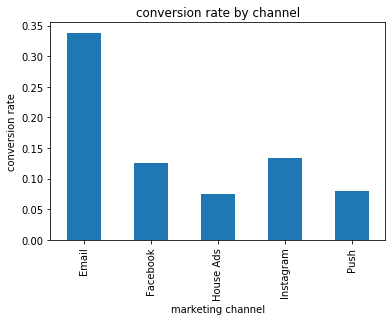

In [55]:
#plot conversion rate by channel:

import matplotlib.pyplot as plt

# plot
conversion_by_channel.plot(kind='bar')

# annotate
plt.title('conversion rate by channel')
plt.xlabel('marketing channel')
plt.ylabel('conversion rate')
plt.show()

#### Retention rate by each marketing channel

In [56]:
conv_by_channel = camp.loc[camp['converted'] == True].groupby(['marketing_channel'])['user_id'].nunique()

In [58]:
retain_by_channel = camp.loc[camp['is_retained'] == True].groupby(['marketing_channel'])['user_id'].nunique()

In [61]:
retention_rate = retain_by_channel / conv_by_channel

In [62]:
print(retention_rate)

marketing_channel
Email        0.743316
Facebook     0.954751
House Ads    1.268456
Instagram    0.853448
Push         1.233766
Name: user_id, dtype: float64


In [ ]:
retention_rate.plot()

Retention rate by channel seems to be larger than 1

**data investigations** for it

There should be a case where converted is False and retained is True

In [64]:
camp.loc[(camp['converted'] == False) & (camp['is_retained'] == True)]

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
22,a100000050,2018-01-01,House Ads,personalization,False,English,24-30 years,1/2/2018,NaN,True
24,a100000051,2018-01-01,Push,personalization,False,English,30-36 years,1/2/2018,NaN,True
26,a100000052,2018-01-01,House Ads,personalization,False,English,36-45 years,1/2/2018,NaN,True
28,a100000053,2018-01-01,House Ads,personalization,False,English,45-55 years,1/2/2018,NaN,True
30,a100000054,2018-01-01,House Ads,personalization,False,English,55+ years,1/2/2018,NaN,True
...,...,...,...,...,...,...,...,...,...,...
9985,a100007258,2018-01-15,Email,personalization,False,German,24-30 years,1/15/2018,NaN,True
9993,a100007266,2018-01-16,Email,personalization,False,German,24-30 years,1/16/2018,NaN,True
10005,a100007278,2018-01-16,Email,control,False,German,0-18 years,1/16/2018,NaN,True
10019,a100007292,2018-01-05,Instagram,control,False,German,55+ years,1/17/2018,NaN,True


In [65]:
camp.loc[camp['user_id'] == 'a100000050']
# this cann't explain why the number of retained user can be larger than converted
# Because you already used nunique, so no effect.

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
21,a100000050,2018-01-02,House Ads,personalization,True,English,24-30 years,1/2/2018,NaN,True
22,a100000050,2018-01-01,House Ads,personalization,False,English,24-30 years,1/2/2018,NaN,True


In [68]:
id_look = camp.loc[(camp['converted'] == False) & (camp['is_retained'] == True)]['user_id']

In [69]:
camp.loc[camp['user_id'].isin(id_look)]

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
21,a100000050,2018-01-02,House Ads,personalization,True,English,24-30 years,1/2/2018,NaN,True
22,a100000050,2018-01-01,House Ads,personalization,False,English,24-30 years,1/2/2018,NaN,True
23,a100000051,2018-01-02,House Ads,personalization,True,English,30-36 years,1/2/2018,NaN,True
24,a100000051,2018-01-01,Push,personalization,False,English,30-36 years,1/2/2018,NaN,True
25,a100000052,2018-01-02,House Ads,personalization,True,English,36-45 years,1/2/2018,NaN,True
...,...,...,...,...,...,...,...,...,...,...
9985,a100007258,2018-01-15,Email,personalization,False,German,24-30 years,1/15/2018,NaN,True
9993,a100007266,2018-01-16,Email,personalization,False,German,24-30 years,1/16/2018,NaN,True
10005,a100007278,2018-01-16,Email,control,False,German,0-18 years,1/16/2018,NaN,True
10019,a100007292,2018-01-05,Instagram,control,False,German,55+ years,1/17/2018,NaN,True


In [73]:
camp.loc[camp['user_id'] == 'a100007266'] # check another user_id

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
9993,a100007266,2018-01-16,Email,personalization,False,German,24-30 years,1/16/2018,NaN,True


This result tell us that there is imcomplete data, and the case above is impossible to exist in dataset. (data issue)

##### Customer Segmentation analysis by more than one segments

In [74]:
lang_age_conv=camp.loc[camp['converted']==True].groupby(['language_preferred', 'age_group'])['user_id'].nunique()

In [76]:
print(lang_age_conv)

language_preferred  age_group  
Arabic              0-18 years       4
                    19-24 years      2
                    24-30 years      8
                    36-45 years      1
                    45-55 years      3
                    55+ years        1
English             0-18 years     168
                    19-24 years    281
                    24-30 years    201
                    30-36 years     69
                    36-45 years     65
                    45-55 years     61
                    55+ years       66
German              0-18 years      13
                    19-24 years     14
                    24-30 years     17
                    30-36 years      3
                    36-45 years      4
                    45-55 years      6
                    55+ years        2
Spanish             0-18 years       7
                    19-24 years      6
                    24-30 years      2
                    30-36 years      5
                    36-45 years 

#### Unstack the result to a DataFrame in order to plot

In [77]:
lang_age_conv.unstack(level=1)
# level=1 means that make the age_group to become the column.

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,4.0,2.0,8.0,NaN,1.0,3.0,1.0
English,168.0,281.0,201.0,69.0,65.0,61.0,66.0
German,13.0,14.0,17.0,3.0,4.0,6.0,2.0
Spanish,7.0,6.0,2.0,5.0,4.0,5.0,7.0


In [81]:
df_lang_age_conv = lang_age_conv.unstack(level=1)

Same function as above

In [79]:
df_language_age_convert=pd.DataFrame(lang_age_conv.unstack(level=1))

In [80]:
print(df_language_age_convert)

age_group           0-18 years  19-24 years  24-30 years  30-36 years  \
language_preferred                                                      
Arabic                     4.0          2.0          8.0          NaN   
English                  168.0        281.0        201.0         69.0   
German                    13.0         14.0         17.0          3.0   
Spanish                    7.0          6.0          2.0          5.0   

age_group           36-45 years  45-55 years  55+ years  
language_preferred                                       
Arabic                      1.0          3.0        1.0  
English                    65.0         61.0       66.0  
German                      4.0          6.0        2.0  
Spanish                     4.0          5.0        7.0  


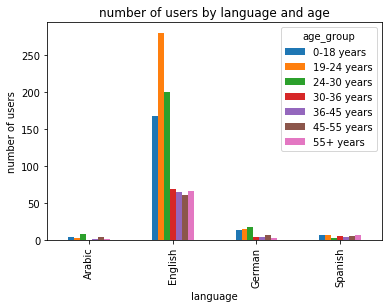

In [82]:
# plot
df_lang_age_conv.plot(kind='bar') # or we could also use df_language_age_convert.plot(kind='bar')

# annotate
plt.title('number of users by language and age')
plt.xlabel('language')
plt.ylabel('number of users')
plt.show()

The result above is useless because there is a large group of English users, so it is better to use ratio

#### Conversion rate by language and age

In [84]:
language_age = camp.groupby(['language_preferred', 'age_group'])['user_id'].nunique()
language_age

language_preferred  age_group  
Arabic              0-18 years       16
                    19-24 years      18
                    24-30 years      16
                    30-36 years      12
                    36-45 years      13
                    45-55 years      14
                    55+ years        17
English             0-18 years     1124
                    19-24 years    1215
                    24-30 years    1119
                    30-36 years     976
                    36-45 years     991
                    45-55 years     976
                    55+ years       920
German              0-18 years       24
                    19-24 years      23
                    24-30 years      29
                    30-36 years      12
                    36-45 years      14
                    45-55 years      20
                    55+ years         9
Spanish             0-18 years       43
                    19-24 years      51
                    24-30 years      54
        

In [85]:
lang_age_conv=camp.loc[camp['converted']==True].groupby(['language_preferred', 'age_group'])['user_id'].nunique()
lang_age_conv

language_preferred  age_group  
Arabic              0-18 years       4
                    19-24 years      2
                    24-30 years      8
                    36-45 years      1
                    45-55 years      3
                    55+ years        1
English             0-18 years     168
                    19-24 years    281
                    24-30 years    201
                    30-36 years     69
                    36-45 years     65
                    45-55 years     61
                    55+ years       66
German              0-18 years      13
                    19-24 years     14
                    24-30 years     17
                    30-36 years      3
                    36-45 years      4
                    45-55 years      6
                    55+ years        2
Spanish             0-18 years       7
                    19-24 years      6
                    24-30 years      2
                    30-36 years      5
                    36-45 years 

In [87]:
conv_rate = lang_age_conv / language_age
lang_age_conv / language_age

language_preferred  age_group  
Arabic              0-18 years     0.250000
                    19-24 years    0.111111
                    24-30 years    0.500000
                    30-36 years         NaN
                    36-45 years    0.076923
                    45-55 years    0.214286
                    55+ years      0.058824
English             0-18 years     0.149466
                    19-24 years    0.231276
                    24-30 years    0.179625
                    30-36 years    0.070697
                    36-45 years    0.065590
                    45-55 years    0.062500
                    55+ years      0.071739
German              0-18 years     0.541667
                    19-24 years    0.608696
                    24-30 years    0.586207
                    30-36 years    0.250000
                    36-45 years    0.285714
                    45-55 years    0.300000
                    55+ years      0.222222
Spanish             0-18 years     0.162791


In [90]:
df_conv_rate = conv_rate.unstack()
conv_rate.unstack()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,0.250000,0.111111,0.500000,NaN,0.076923,0.214286,0.058824
English,0.149466,0.231276,0.179625,0.070697,0.065590,0.062500,0.071739
German,0.541667,0.608696,0.586207,0.250000,0.285714,0.300000,0.222222
Spanish,0.162791,0.117647,0.037037,0.087719,0.102564,0.106383,0.205882


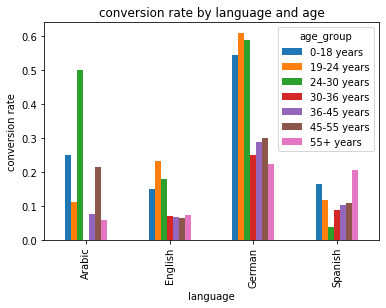

In [91]:
# plot
df_conv_rate.plot(kind='bar')

# annotate
plt.title('conversion rate by language and age')
plt.xlabel('language')
plt.ylabel('conversion rate')
plt.show()

### A/B Testing

In [92]:
from scipy import stats
import numpy as np

In [93]:
camp['test_control'].value_counts()

control            5076
personalization    4946
Name: test_control, dtype: int64

In [95]:
# Let's only look at Email marketing channel
email = camp.loc[camp['marketing_channel'] == 'Email']

In [96]:
print(email)

          user_id date_served marketing_channel     test_control  converted  \
354    a100000526  2018-01-01             Email  personalization       True   
358    a100000530  2018-01-05             Email  personalization       True   
362    a100000534  2018-01-09             Email  personalization      False   
366    a100000538  2018-01-13             Email  personalization       True   
370    a100000542  2018-01-17             Email  personalization       True   
...           ...         ...               ...              ...        ...   
10015  a100007288  2018-01-17             Email          control       True   
10016  a100007289  2018-01-17             Email          control       True   
10017  a100007290  2018-01-17             Email          control       True   
10018  a100007291  2018-01-17             Email          control       True   
10020  a100007293  2018-01-17             Email          control       True   

      language_preferred    age_group date_subscrib

For email channel, there are the test groups which received personalization email and the control group which receive normal email

In [97]:
email.groupby(['test_control'])['user_id'].nunique()

test_control
control            270
personalization    284
Name: user_id, dtype: int64

In [98]:
# Let's compare the conversion rate between test and control group
email.loc[email['converted']==True].groupby(['test_control'])['user_id'].nunique()

test_control
control             76
personalization    111
Name: user_id, dtype: int64

In [99]:
email.loc[email['converted']==True].groupby(['test_control'])['user_id'].nunique()\
/email.groupby(['test_control'])['user_id'].nunique()

test_control
control            0.281481
personalization    0.390845
Name: user_id, dtype: float64

Calculate the lift:

(Test conversion rate - Control conversion rate) / Control converstion rate

In [100]:
lift = (0.390845 - 0.281481)/ 0.281481

In [101]:
print(lift)

0.38853066459192637
